In [1]:
import numpy as np
from matplotlib import pyplot as plt

# 4 epix

In [11]:
!ls ../../npys

det_img0.npy	     det_img2.npy	  jungfrau.npy
det_img0_Sibeee.npy  det_img2_Sibeee.npy  jungfrau_run29.npy
det_img1.npy	     det_img3.npy	  jungfrau_run30.npy
det_img1_Sibeee.npy  det_img3_Sibeee.npy  jungfrau_run31.npy


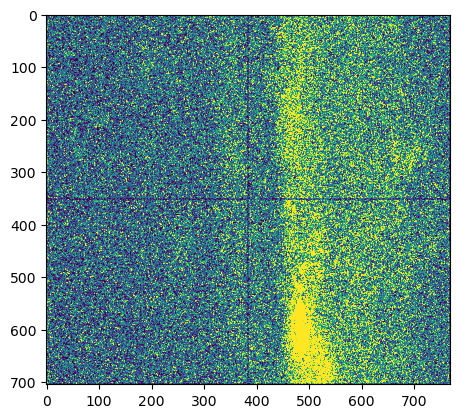

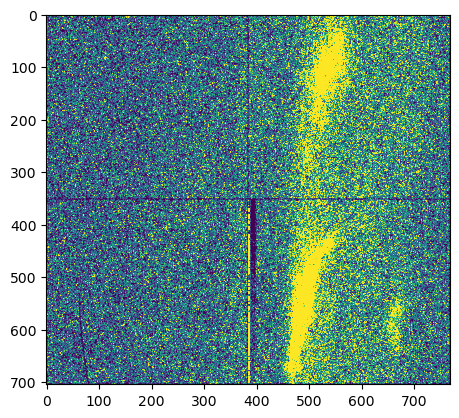

In [17]:
epix = np.load("../../npys/det_img2_Sibeee.npy")
# epix = np.load("../../npys/det_img3.npy")
plt.figure()
plt.imshow(epix, vmin=0, vmax=1)

epix = np.load("../../npys/det_img0_Sibeee.npy")
plt.figure()
plt.imshow(epix, vmin=0, vmax=1)


# Jungfrau

In [128]:
img.shape[1]

1030

(600.0, 800.0)

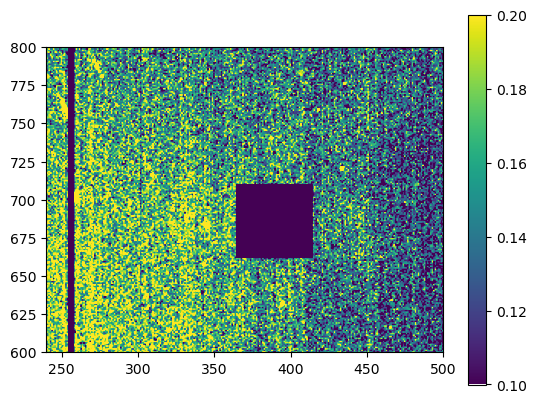

In [202]:
img = np.load("../../npys/jungfrau_run59.npy")
mask = np.load("../../../shared/mask/mask_jungfrau_231103_02.npy")
# print(mask.dtype)

plt.figure()
mask_inv = ~mask.astype(bool)
# plt.imshow(mask_inv, vmin=0, vmax=1)

rows = [0,255,258,513,550,805,808,img.shape[0]-1]
cols = [0,255,258,513,516,771,774,img.shape[1]-1]

for row in rows:
    mask_inv[row,:] = 0
for col in cols:
    mask_inv[:,col] = 0

# print(mask_inv.dtype)
# mask_inv = mask_inv.astype('int')
# print(mask_inv.dtype)
# new_mask = ~mask_inv
# print(np.sum(new_mask), np.sum(mask_inv))
mask_inv[662:710,365:415] = 0
# img[mask_inv==0] = np.nan

plt.imshow(img*mask_inv, vmin=0.1, vmax=0.2)
plt.colorbar()
plt.xlim(240,500)
plt.ylim(600,800)

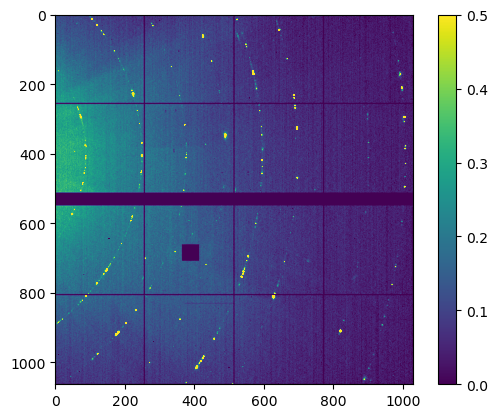

In [208]:
plt.figure()
new_mask = np.invert(mask_inv)
# np.save("../../../shared/mask/mask_jungfrau_231103_02.npy", new_mask)
plt.imshow(img*~new_mask, vmin=0, vmax=0.5)
plt.colorbar()

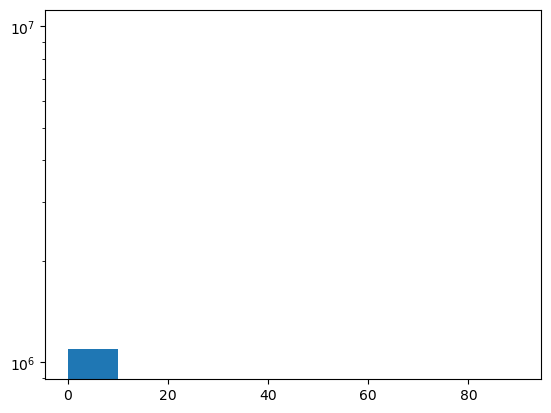

In [151]:
plt.figure()
img = np.load("../../npys/jungfrau_run59.npy")
img[mask==0] = 0
plt.hist(img.flatten(), bins=np.arange(0,100,10), )
plt.yscale('log')